In [8]:
library('dplyr')
library('tidyr')
library('stringr')
library('tidyverse')
library('ggplot2')
library('data.table')
library('pheatmap')
library('ggrepel')
options(repr.plot.width = 5, repr.plot.height = 5) # set default plot size
options(jupyter.plot_mimetypes = 'image/png') # output SVG
options(ggrepel.max.overlaps = Inf)

In [9]:
library(corrplot)
library(RColorBrewer)

In [10]:
CRISPRi_zscore_table = read.csv('~/github/THP1_PrimaryMac_CRISPR/Perturbseq/CRISPRi_zscore_table.csv', row.names = 1)

In [31]:
CRISPRi_zscore_table_subset = CRISPRi_zscore_table[, colSums(abs(CRISPRi_zscore_table) > 1.645) > 0]

In [54]:
write.csv(CRISPRi_zscore_table_subset, "~/github/THP1_PrimaryMac_CRISPR/Perturbseq/CRISPRi_zscore_table_subset.csv")

In [33]:
assay_cor <- cor(t(CRISPRi_zscore_table_subset))

In [35]:
library(viridis)

pdf 
  2

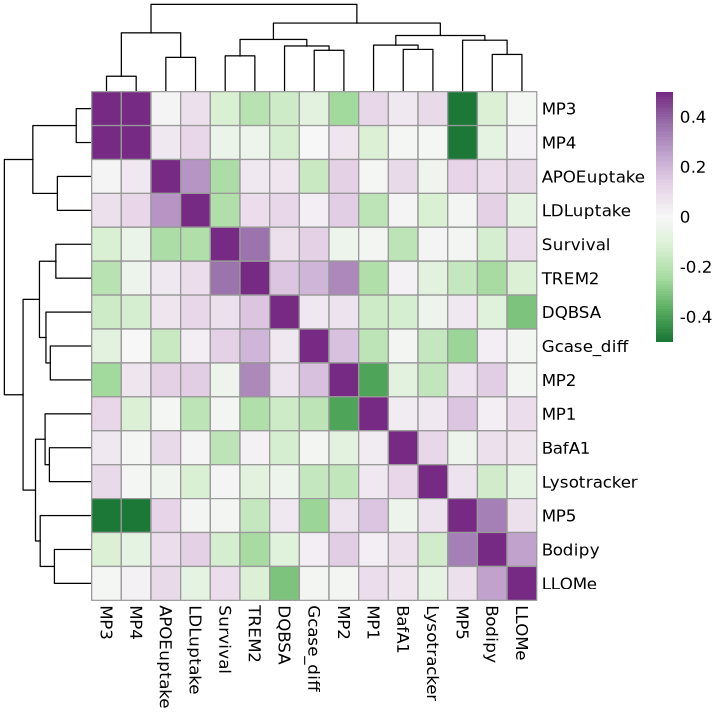

In [49]:
options(repr.plot.width = 6, repr.plot.height = 6) # set default plot size
breaks <- seq(-0.5, 0.5, length.out = 100)
p <- pheatmap(assay_cor, 
         breaks = breaks,
         color = colorRampPalette(rev(brewer.pal(9, "PRGn")))(length(breaks) - 1))

pdf("CRISPRi_assay_clustering_heatmap.pdf")
print(p)
dev.off()

In [38]:
CRISPRi_correlation = cor(CRISPRi_zscore_table_subset)

In [41]:
testRes = cor.mtest(CRISPRi_correlation, conf.level = 0.95)

In [43]:
options(repr.plot.width = 30, repr.plot.height = 30) # set default plot size
pdf("CRISPRi_correlation_diagonal_heatmap.pdf")

corrplot(CRISPRi_correlation, type = "lower", order = "hclust", hclust.method = 'ward.D2', method = 'circle', p.mat = testRes$p, sig.level = c(0.001, 0.01, 0.05),
         insig = 'blank', tl.pos = 'ld', tl.srt = 45, tl.cex = 1, tl.col = "black", col = rev(brewer.pal(n = 11, name = "RdBu")))

dev.off()

pdf 
  2